# ***2024 Seattle PM 2.5 Prediction***

# 1.  Covid and non-covid period PM 2.5 comparison

1.  Import zip file

In [ ]:
import pandas as pd
from zipfile import ZipFile

zip_path = 'air_quality_2019_2023.csv.zip'
csv_filename = 'air_quality_2019_2023.csv'

# Open the ZIP file
with ZipFile(zip_path, 'r') as zip_file:
    # Check if the desired CSV file is present
    if csv_filename in zip_file.namelist():
        # Read the CSV file directly from the ZIP archive
        with zip_file.open(csv_filename) as csv_file:
            df = pd.read_csv(csv_file)
            # Now you can use the DataFrame 'df' for your analysis
    else:
        print(f"The file '{csv_filename}' is not found in the ZIP archive.")

2. Examine data

In [ ]:
# Full dataset
df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,18.0,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2023-05-16
1,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,35.0,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2023-05-16
2,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,14.0,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2023-05-16
3,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,36.0,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2023-05-16
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,38.0,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2023-05-16


In [ ]:
# Print all variable names and their data types
for column in df.columns:
    print(f"{column}, Dtype: {df[column].dtype}")

State Code, Dtype: int64
County Code, Dtype: int64
Site Num, Dtype: int64
Parameter Code, Dtype: int64
POC, Dtype: int64
Latitude, Dtype: float64
Longitude, Dtype: float64
Datum, Dtype: object
Parameter Name, Dtype: object
Sample Duration, Dtype: object
Pollutant Standard, Dtype: object
Date Local, Dtype: object
Units of Measure, Dtype: object
Event Type, Dtype: object
Observation Count, Dtype: int64
Observation Percent, Dtype: float64
Arithmetic Mean, Dtype: float64
1st Max Value, Dtype: float64
1st Max Hour, Dtype: int64
AQI, Dtype: float64
Method Code, Dtype: float64
Method Name, Dtype: object
Local Site Name, Dtype: object
Address, Dtype: object
State Name, Dtype: object
County Name, Dtype: object
City Name, Dtype: object
CBSA Name, Dtype: object
Date of Last Change, Dtype: object


In [ ]:
# Print missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
State Code                   0
County Code                  0
Site Num                     0
Parameter Code               0
POC                          0
Latitude                     0
Longitude                    0
Datum                        0
Parameter Name               0
Sample Duration              0
Pollutant Standard     1174320
Date Local                   0
Units of Measure             0
Event Type                   0
Observation Count            0
Observation Percent          0
Arithmetic Mean              0
1st Max Value                0
1st Max Hour                 0
AQI                    1174320
Method Code             296780
Method Name                  0
Local Site Name          76775
Address                   2048
State Name                   0
County Name                  0
City Name                    0
CBSA Name               213312
Date of Last Change          0
dtype: int64


In [ ]:
# Convert 'Date Local' to datetime
df['Date Local'] = pd.to_datetime(df['Date Local'])

3. Create covid and non-covid comparison boxplot

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# First set of operations for 2019
df['Date Local'] = pd.to_datetime(df['Date Local'])
df_2019 = df[df['Date Local'].dt.year == 2019]
selected_cities = ['Seattle', 'Philadelphia', 'Tampa']
select_data_2019 = df_2019[df_2019['City Name'].isin(selected_cities)]
fig_1 = px.box(select_data_2019, x="City Name", y="Arithmetic Mean", hover_data=["Date Local", 'City Name'])

# First set of operations for 2020
df_2020 = df[df['Date Local'].dt.year == 2020]
select_data_2020 = df_2020[df_2020['City Name'].isin(selected_cities)]
fig_2 = px.box(select_data_2020, x="City Name", y="Arithmetic Mean", hover_data=["Date Local", 'City Name'])

# Second set of operations for 2021
df_2021 = df[df['Date Local'].dt.year == 2021]
select_data_2021 = df_2021[df_2021['City Name'].isin(selected_cities)]
fig_3 = px.box(select_data_2021, x="City Name", y="Arithmetic Mean", hover_data=["Date Local", 'City Name'])

# Third set of operations for 2022
df_2022 = df[df['Date Local'].dt.year == 2022]
select_data_2022 = df_2022[df_2022['City Name'].isin(selected_cities)]
fig_4 = px.box(select_data_2022, x="City Name", y="Arithmetic Mean", hover_data=["Date Local", 'City Name'])

# Fourth set of operations for 2023
df_2023 = df[df['Date Local'].dt.year == 2023]
select_data_2023 = df_2023[df_2023['City Name'].isin(selected_cities)]
fig_5 = px.box(select_data_2023, x="City Name", y="Arithmetic Mean", hover_data=["Date Local", 'City Name'])

# Create subplots with shared y-axis
fig = make_subplots(rows=1, cols=5, subplot_titles=('2019', '2020 - Covid', '2021 - Covid', '2022 - Covid', '2023'), shared_yaxes=True)

# Add box plots to subplots
fig.add_trace(go.Box(fig_1['data'][0]), row=1, col=1)
fig.add_trace(go.Box(fig_2['data'][0]), row=1, col=2)
fig.add_trace(go.Box(fig_3['data'][0]), row=1, col=3)
fig.add_trace(go.Box(fig_4['data'][0]), row=1, col=4)
fig.add_trace(go.Box(fig_5['data'][0]), row=1, col=5)

# Update layout
fig.update_layout(showlegend=False)

# Show the overlapped figure
fig.show()

4. T-test for non-Covid time and Covid time

In [ ]:
from scipy.stats import ttest_ind

# Extract data for COVID time (2020, 2021, and 2022)
covid_data = pd.concat([select_data_2020, select_data_2021, select_data_2022])

# Extract data for non-COVID time (2019 and 2023)
non_covid_data = pd.concat([select_data_2019, select_data_2023])

# Perform t-test
statistic, p_value = ttest_ind(covid_data['Arithmetic Mean'], non_covid_data['Arithmetic Mean'])

# Display results
print(f"T-test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between COVID and non-COVID time.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between COVID and non-COVID time.")

T-test Statistic: -6.084308458300606
P-value: 1.1832137102123012e-09
Reject the null hypothesis: There is a significant difference between COVID and non-COVID time.


5. Line chart comparison of non covid and covid time

In [ ]:
# Convert 'Date Local' to datetime
df['Date Local'] = pd.to_datetime(df['Date Local'])

# Define selected cities
selected_cities = ['Seattle', 'Philadelphia', 'Tampa']

# Filter data for the two periods
average_2019_2023 = df[(df['Date Local'].dt.year == 2019) | (df['Date Local'].dt.year == 2023)]
average_2020_2022 = df[(df['Date Local'].dt.year >= 2020) & (df['Date Local'].dt.year <= 2022)]

# Calculate monthly averages for each period
monthly_average_2019_2023 = average_2019_2023.groupby([average_2019_2023['Date Local'].dt.month])['Arithmetic Mean'].mean().reset_index(name='Average Mean')
monthly_average_2020_2022 = average_2020_2022.groupby([average_2020_2022['Date Local'].dt.month])['Arithmetic Mean'].mean().reset_index(name='Average Mean')

# Create a line chart for the two periods
fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_average_2019_2023['Date Local'], y=monthly_average_2019_2023['Average Mean'],
                         mode='lines', name='Non - Covid'))

fig.add_trace(go.Scatter(x=monthly_average_2020_2022['Date Local'], y=monthly_average_2020_2022['Average Mean'],
                         mode='lines', name='Covid'))

# Update layout
fig.update_layout(title='Comparison of Monthly Average Means (Non-Covid) vs (Covid)',
                  xaxis_title='Month', yaxis_title='Average Mean')

# Show the chart
fig.show()

6. Kolmogorov-Smirnov test for Covid and Non-covid PM 2.5 level significance test

In [ ]:
from scipy.stats import ks_2samp

# Perform Kolmogorov-Smirnov test without checking assumptions
statistic_ks, p_value_ks = ks_2samp(covid_data['Arithmetic Mean'], non_covid_data['Arithmetic Mean'])

# Display results
print(f"KS Statistic: {statistic_ks}")
print(f"P-value (KS test): {p_value_ks}")

# Interpret the results
alpha = 0.05
if p_value_ks < alpha:
    print("Reject the null hypothesis (KS test): There is a significant difference between COVID and non-COVID time.")
else:
    print("Fail to reject the null hypothesis (KS test): There is no significant difference between COVID and non-COVID time.")

KS Statistic: 0.033792623460872084
P-value (KS test): 2.672506527689183e-07
Reject the null hypothesis (KS test): There is a significant difference between COVID and non-COVID time.


# 2. Time Series Prediction for 2024 PM 2.5 level

1. Examine current trend

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

selected_cities = ['Seattle', 'Tampa', 'Philadelphia']
select_data = df[df['City Name'].isin(selected_cities)]


average_means = select_data.groupby(['Date Local', 'City Name'])['Arithmetic Mean'].mean().reset_index(name='Average Mean')
average_means['Year'] = average_means['Date Local'].dt.year
average_means['Month'] = average_means['Date Local'].dt.month

# Group by 'Year', 'Month', and 'City Name', and calculate the mean of 'Average Mean'
yearly_monthly_average_means = average_means.groupby(['Year', 'Month', 'City Name'])['Average Mean'].mean().reset_index()

# Filter data for Seattle and the specified years
average_means_month_seattle = yearly_monthly_average_means[(yearly_monthly_average_means['City Name'] == 'Seattle') &
                                                                    ((yearly_monthly_average_means['Year'] == 2022) |
                                                                     (yearly_monthly_average_means['Year'] == 2021) |
                                                                     (yearly_monthly_average_means['Year'] == 2020) |
                                                                     (yearly_monthly_average_means['Year'] == 2019) |
                                                                     (yearly_monthly_average_means['Year'] == 2023))]

average_means_month_seattle['Date Local'] = pd.to_datetime(average_means_month_seattle[['Year', 'Month']].assign(DAY=1))

# Plot the time series
fig = px.line(average_means_month_seattle, x='Date Local', y='Average Mean', title='Average Mean Over Time in Seattle')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Average Mean')
fig.show()

<ipython-input-110-4342a5128589>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Average of Seattle's PM 2.5 level in September
september_average_means = yearly_monthly_average_means[yearly_monthly_average_means['Month'] == 9]['Average Mean'].mean()
september_average_means

10.096933482124527

2. Exponential smoothing - Seattle

In [ ]:
import pandas as pd
import statsmodels.api as sm
import plotly.express as px

# Convert 'Average Mean' column to numeric
average_means_month_seattle['Average Mean'] = pd.to_numeric(average_means_month_seattle['Average Mean'], errors='coerce')

# Initialize and fit the Simple Exponential Smoothing model
ets_model = sm.tsa.SimpleExpSmoothing(average_means_month_seattle['Average Mean'])
ets_fit = ets_model.fit(smoothing_level=0.1, optimized=False)

# Get the fitted values
fitted_values = ets_fit.fittedvalues

# Forecast for the next 19 months (until end of 2024)
forecast_values = ets_fit.forecast(19)
PERIODS_AHEAD=19

# Plotting using Plotly Express
fig = px.line(x=average_means_month_seattle['Date Local'],
              y=average_means_month_seattle['Average Mean'],
              labels={'x': 'Date', 'y': 'Average Mean'},
              title='Average Mean Over Time - Seattle')

# Add fitted values and forecast to the plot
fig.add_scatter(x=average_means_month_seattle['Date Local'],
                y=fitted_values,
                mode='lines',
                name='Fitted Values')

fig.add_scatter(x=pd.date_range(start=average_means_month_seattle['Date Local'].iloc[-1], periods=PERIODS_AHEAD, freq='M'),
                y=forecast_values,
                mode='lines',
                name='Forecast')

# Show the plot
fig.show()

<ipython-input-112-8a172d540734>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



3. Holt model - seattle

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Build Holt model for prediction of next 19 months(until end of 2024)
PERIODS_AHEAD= 19
ets_model = sm.tsa.ExponentialSmoothing(average_means_month_seattle['Average Mean'], trend='add', seasonal=None, initialization_method='estimated')
ets_fit = ets_model.fit(smoothing_level=0.1, smoothing_trend=0.2, optimized=False)
forecast = ets_fit.forecast(steps=PERIODS_AHEAD)

# Plotting using Plotly Express
fig = px.line(x=average_means_month_seattle['Date Local'], y=average_means_month_seattle['Average Mean'], labels={'x': 'Date Local', 'y': 'Demand'}, title='Average Demand Over Time - Seattle')

# Add fitted values and forecast to the plot
fig.add_scatter(x=average_means_month_seattle['Date Local'], y=ets_fit.fittedvalues, mode='lines', name='Fitted Values')

# Generate dates for the forecast
forecast_dates = pd.date_range(start=average_means_month_seattle['Date Local'].iloc[-1], periods=PERIODS_AHEAD + 1, freq='M')[1:]

# Add forecast to the plot
fig.add_scatter(x=forecast_dates, y=forecast, mode='lines', name='Forecast')

# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



4. Winter model - Seattle

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets_model = sm.tsa.ExponentialSmoothing(average_means_month_seattle['Average Mean'], trend='add', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(remove_bias=True)
forecast = ets_fit.forecast(steps=PERIODS_AHEAD)

# Plotting using Plotly Express
fig = px.line(x=average_means_month_seattle['Date Local'], y=average_means_month_seattle['Average Mean'], labels={'x': 'Date Local', 'y': 'Average Mean'}, title='Average Mean Over Time - Seattle')

# Add fitted values and forecast to the plot
fig.add_scatter(x=average_means_month_seattle['Date Local'], y=ets_fit.fittedvalues, mode='lines', name='Fitted Values')

# Generate dates for the forecast
forecast_dates = pd.date_range(start=average_means_month_seattle['Date Local'].iloc[-1], periods=19, freq='M')[1:]

# Add forecast to the plot
fig.add_scatter(x=forecast_dates, y=forecast, mode='lines', name='Forecast')

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



5. Arima model - Seattle

ADF Statistic -6.545943778073525
p-value 9.099124513873085e-09


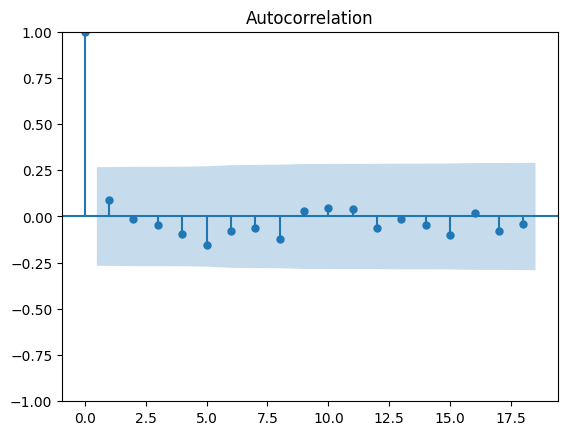

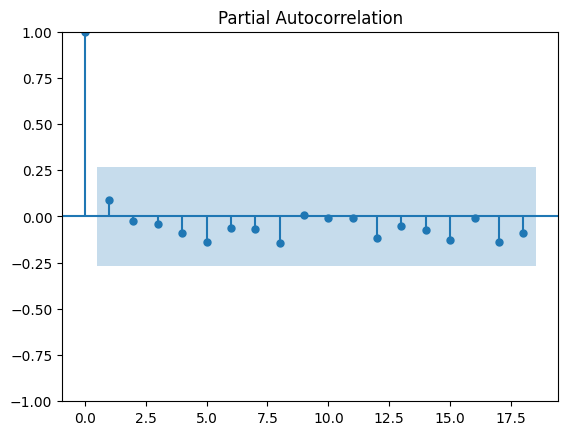

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Check relevant metrics
adf = adfuller(average_means_month_seattle['Average Mean'])

print(f'ADF Statistic {adf[0]}')
print(f'p-value {adf[1]}')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(average_means_month_seattle['Average Mean']).show()
plot_pacf(average_means_month_seattle['Average Mean']).show()

In [ ]:
# Fit Arima
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model of order (p,d,q)
model = ARIMA(average_means_month_seattle['Average Mean'], order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Average Mean   No. Observations:                   54
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -167.122
Date:                Mon, 04 Mar 2024   AIC                            342.244
Time:                        04:49:01   BIC                            350.200
Sample:                             0   HQIC                           345.313
                                 - 54                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2750      2.571      2.830      0.005       2.236      12.314
ar.L1         -0.0689     16.432     -0.004      0.997     -32.274      32.137
ma.L1          0.1580     16.444      0.010      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



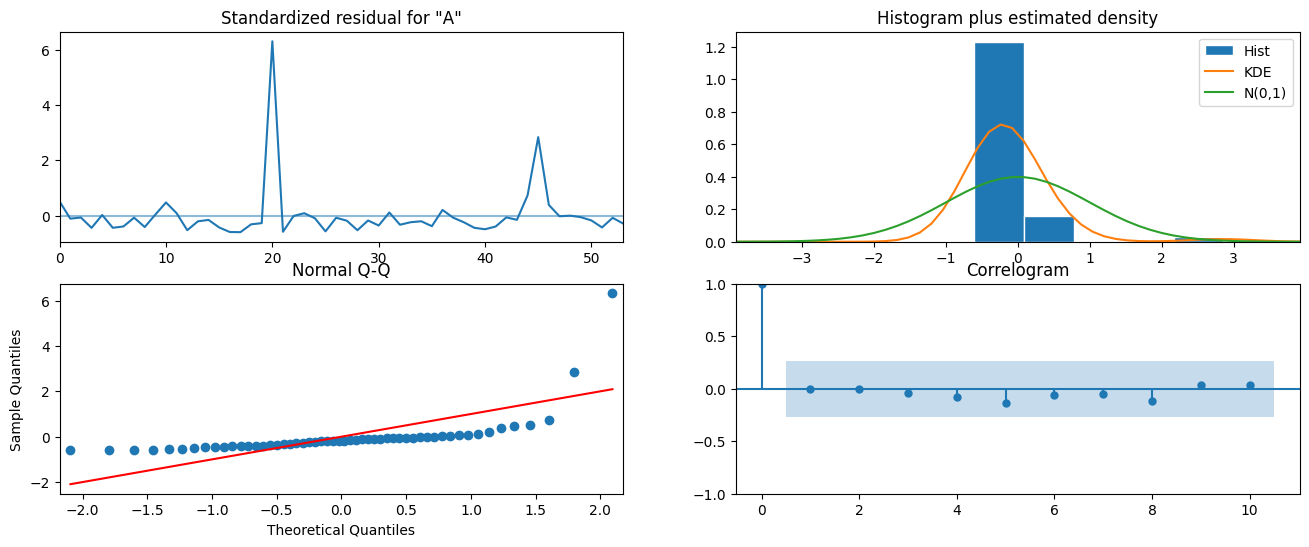

In [ ]:
# ARIMA model diagnostic
model_fit.plot_diagnostics(figsize = (16,6)).show()

In [ ]:
#install pmdarima package
!pip install pmdarima
import pmdarima as pm

# Find optimal arima model
arima_model = pm.auto_arima(average_means_month_seattle['Average Mean'],
                            start_p=1, start_q=1,
                            max_p=5, max_q=5,
                            seasonal=False,
                            stepwise=True,
                            suppress_warnings=True,
                            trace=True)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=393.000, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=362.775, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=377.315, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=358.632, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=357.624, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=358.350, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=344.145, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=342.232, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=340.262, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=338.679, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=340.248, Time=0.09 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   54
Model:                        SARIMAX   Log Likelihood                -167.339
Date:                Mon, 04 Mar 2024   AIC                            338.679
Time:                        04:49:11   BIC                            342.657
Sample:                             0   HQIC                           340.213
                                 - 54                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.2731      1.953      3.724      0.000       3.445      11.101
sigma2        28.7857      3.893      7.395      0.000      21.156      36.415
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):              1863.27
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               3.91   Skew:                             4.99
Prob(H) (two-sided):                  0.01   Kurtosis:                        29.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Make predictions for the next 19 months (untill end of 2024)
forecast_steps = 19
forecast_arima = arima_model.predict(n_periods=forecast_steps)

# Create a date range for the next 19 months
forecast_dates = pd.date_range(start=average_means_month_seattle['Date Local'].iloc[-1], periods=forecast_steps + 1, freq='M')[1:]

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date Local': forecast_dates, 'Forecast': forecast_arima})

# Plot the original data and the forecast
fig = px.line(x=average_means_month_seattle['Date Local'], y=average_means_month_seattle['Average Mean'], title='ARIMA Time Series Forecasting')
fig.add_scatter(x=forecast_df['Date Local'], y=forecast_df['Forecast'], mode='lines', name='Forecast', line=dict(color='red', dash='dash'))
fig.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



6. SARIMA - Seattle

In [ ]:
# Build sarima model
sarima_model = sm.tsa.SARIMAX(average_means_month_seattle['Average Mean'],
                              order=(1, 0, 1),
                              seasonal_order=(1, 1, 0, 11)
                              )

# Fit the SARIMA model
sarima_fit = sarima_model.fit()

# Print the summary of the fitted model
print(sarima_fit.summary())

# Make forecast with the fitted SARIMA model
forecast_steps = 19  # forecast for the next 19 months
forecast = sarima_fit.forecast(steps=forecast_steps)

# Print the forecast
print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                                      SARIMAX Results                                      
Dep. Variable:                        Average Mean   No. Observations:                   54
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 11)   Log Likelihood                -142.205
Date:                             Mon, 04 Mar 2024   AIC                            292.410
Time:                                     04:49:12   BIC                            299.455
Sample:                                          0   HQIC                           295.008
                                              - 54                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0105      2.808     -0.004      0.997      -5.513       5.492
ma.L1          0.1159      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [ ]:
# Plot prediction of SARIMA
PERIODS_AHEAD= 19

fig = px.line(x=average_means_month_seattle['Date Local'], y=average_means_month_seattle['Average Mean'], labels={'x': 'Date Local', 'y': 'Average Mean'}, title='Average Mean Over Time - Seattle')

# Add fitted values and forecast to the plot
fig.add_scatter(x=average_means_month_seattle['Date Local'], y=sarima_fit.fittedvalues, mode='lines', name='Fitted Values')

# Generate dates for the forecast
forecast_dates = pd.date_range(start=average_means_month_seattle['Date Local'].iloc[-1], periods=PERIODS_AHEAD , freq='M')[1:]

# Add forecast to the plot
fig.add_scatter(x=forecast_dates, y=forecast, mode='lines', name='Forecast')

# Show the plot
fig.show()

## 3. Cross-Validation for All Models

In [ ]:
import numpy as np

def calculate_mape(actual_values, predicted_values):
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    # Avoid division by zero
    mask = actual_values != 0
    actual_values = actual_values[mask]
    predicted_values = predicted_values[mask]

    # Calculate MAPE
    mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
    return mape

# Create a train and test sets:
train, test = average_means_month_seattle.iloc[:round(len(average_means_month_seattle) * 0.8)], average_means_month_seattle.iloc[round(len(average_means_month_seattle) * 0.8):]

# Winters
ets_model = sm.tsa.ExponentialSmoothing(train['Average Mean'], trend='add',
                                        seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(remove_bias=True)
forecast_winters = ets_fit.forecast(steps=len(test))

#SARIMA
sarima_model = sm.tsa.SARIMAX(train['Average Mean'],
                              order=(1, 0, 1),
                              seasonal_order=(1, 1, 0,11)
                              )

# Fit the SARIMA model
sarima_fit = sarima_model.fit()

# Make forecast with the fitted SARIMA model
forecast_sarima = sarima_fit.forecast(steps=len(test))

# ETS
ets_model = sm.tsa.SimpleExpSmoothing(train['Average Mean'])
ets_fit = ets_model.fit(smoothing_level=0.3, optimized=False)

# Get the fitted values
fitted_ets = ets_fit.fittedvalues

# Forecast ets
forecast_ets = ets_fit.forecast(steps=len(test))

# Holt
holt_model = sm.tsa.ExponentialSmoothing(train['Average Mean'], trend='add', seasonal=None, initialization_method='estimated')
holt_fit = holt_model.fit(smoothing_level=0.1, smoothing_trend=0.2, optimized=False)
forecast_holt = holt_fit.forecast(steps=len(test))

# ARIMA
forecast_arima = arima_model.predict(n_periods=len(test))

# Calculate MAPE
mape_winters = calculate_mape(test['Average Mean'], forecast_winters)
mape_sarima = calculate_mape(test['Average Mean'], forecast_sarima)
mape_ETS = calculate_mape(test['Average Mean'], forecast_ets)
mape_holt = calculate_mape(test['Average Mean'], forecast_holt)
mape_arima = calculate_mape(test['Average Mean'], forecast_arima)
print("MAPE of winter's model:", mape_winters)
print("MAPE of SARIMA's model:", mape_sarima)
print("MAPE of ETS's model:", mape_ETS)
print("MAPE of holt's model:", mape_holt)
print("MAPE of arima's model:", mape_arima)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/sta

MAPE of winter's model: 22.243839152118497
MAPE of SARIMA's model: 26.243680076671055
MAPE of ETS's model: 25.40579486382899
MAPE of holt's model: 49.97236243926514
MAPE of arima's model: 23.214513358767874


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model wi